# BALTO Graphical User Interface (A Prototype)

Scott Dale Peckham<sup>1</sup>, Maria Stoica<sup>1</sup>, D. Sarah Stamps<sup>2</sup>, James Gallagher<sup>3</sup>, Nathan Potter<sup>3</sup>, David Fulker<sup>3</sup> <br>
<sup>1</sup>University of Colorado, Boulder, United States of America;
<sup>2</sup>Virginia Tech;
<sup>1</sup>OPeNDAP, Inc.<br>
Corresponding author:  Scott.Peckham@colorado.edu

#### Table of Contents

1.  <a href="#intro">Introduction</a> <br>
2.  <a href="#start_gui">Import and Start the BALTO GUI</a> <br>
3.  <a href="#get_data">Download and Explore Some Data</a> <br>
4.  <a href="#plot_data">Plot Some Data</a> <br>
5.  <a href="#var_match">Matching Variable Names to Standardized Names</a> <br>
6.  <a href="#low_level">Low-level Access to GUI Settings</a> <br>
7.  <a href="#references">References for More Info</a> <br>
8.  <a href="#setup">Appendix 1: Set up a conda environment called "balto"</a> <br>

## Introduction  <a id="intro"></a>

This Jupyter notebook creates a GUI (graphical user interface) for the BALTO (Brokered Alignment of Long-Tail Observations) project.  BALTO is funded by the NSF EarthCube program.  The GUI aims to provide a simplified and customizable method for users to access data sets of interest on servers that support the OpenDAP data access protocol.  This interactive GUI runs within the Jupyter notebook and uses the Python packages: <b>ipywidgets</b> (for widget controls), <b>ipyleaflet</b> (for interactive maps) and <b>pydap</b> (an OpenDAP client).

The Python source code to create the GUI and to process events is in a Python module called <b>balto_gui.py</b> that must be copied into the same directory as this Jupyter notebook.  A Python module to create plots and color images from data, called <b>balto_plot.py</b>, is included as well.

This GUI can be toggled between an <b>accordion style</b> and a <b>tab style</b>.  Both styles allow you to switch between GUI panels without scrolling in the notebook.

You can run this notebook in a browser window without installing anything on your computer, using something called <b>Binder</b>.  On GitHub, on the README page, you will see a Binder icon and a link labeled "Launch Binder".

To run this Jupyter notebook without Binder, it is recommended to install Python 3.7 (or higher) from an Anaconda distribution and to then create a <b>conda environment</b> called <b>balto</b>.  Instructions for how to create a conda environment are given in Appendix 1.

<b>Note:</b> Some features, such as the DatePicker, may not work in Safari but work in Chrome.  In addition, the Download Format droplist (Download Data panel) and OpenDAP Package droplist (Settings panel) do not yet work at all.  Map projections (via the cartopy package) were added in 2020-12 and are not yet fully tested. 

This GUI makes it much easier to browse, download and analyze data from servers that support the OpenDAP protocol.  Under the hood (in balto_gui.py), it performs many calculations automatically, by making use of any metadata that is available for a chosen dataset. Keep in mind, however, that this is a work in progress that will continue to be improved.

The default <b>OpenDAP URL Dir</b> in the GUI is a test server with a wide variety of datasets for testing common, unusual and edge cases.

## Import and Start the BALTO GUI  <a id="start_gui"></a>

In [1]:
import balto_gui as bg
balto = bg.balto_gui()
# balto.show_gui(ACC_STYLE=True)    # Use accordion style
balto.show_gui()   # Use tab style

Output()

## Download and Explore Some Data  <a id="get_data"></a>

First open the <b>Browse Data</b> panel.
If you changed the "OpenDAP URL Dir", click the Reset button at the bottom of the Data panel to restore the defaults.  The OpenDAP URL Dir should again be: <b>http://test.opendap.org/dap/data/nc/</b>.

Click on the Go button. <br>
From the <b>Filename droplist</b>, choose <b>sst.mnmean.nc.gz</b>. <br>
From the <b>Variable</b> droplist, choose <b>sst</b>.

Notice that the shape of this dataset is <b>(1857, 89, 180)</b>,
with dimensions: <b>('time', 'lat', 'lon')</b>.

Next, open the <b>Spatial Extent</b> panel and use the interactive map to choose a geographic bounding box for some region you are interested in.  Try choosing different basemaps from the Basemap droplist above the map.  You can also click on the Full Screen icon in the upper right corner to expand the map to the full screen of your computer.

You can also type new bounding lats and lons into the text boxes and click the <b>Update</b> button.  The map will then zoom to show a bounding box that contains your bounding box.  Note, however, that the aspect ratio of the GUI's map window may not match the shape of your bounding box.  (Sometimes you have to click the <b>Reset</b> button and retry to get it to work properly.)

Now let's zoom into the Caribbean island of Puerto Rico.  In the text boxes, enter <b>-68.2</b> for the West edge, <b>-64.7</b> for the East edge, <b>18.9</b> for the North edge and <b>17.6</b> for the South edge, then click the <b>Update</b> button.  This should zoom in to a view in which the whole island is visible in the window, with water visible all around. You can use the "minus" button (upper left) to zoom out by one click to download a larger array.  

Let's now check how the monthly mean sea surface temperature has changed over the years spanned by the SST dataset we downloaded.  To see the date and time range spanned by this dataset, open the <b>Date Range</b> panel.  If you want, you can change the dates and times to restrict the data to a shorter time period.  For example, you could change the Start Date to 1908-01-01 to restrict to a 100-year time period.

Next, open the <b>Download Data</b> panel and click on the <b>Download</b> button.  This causes the SST dataset --- restricted to this spatial extent and date range --- to be downloaded to your computer and stored in the <b>balto</b> object as <b>user_var</b>.  This may take a minute or so, before you can execute the next cell.

You can now begin to work with the data in this notebook.  First, we print out some of the basic features of the variable "sst".


In [2]:
sst = balto.user_var
print('type(sst) =', type(sst))
print('sst.dtype =', sst.dtype)
print('sst.shape =', sst.shape)
if (hasattr(sst, 'min')):
    print('sst.min() =', sst.min())
    print('sst.max() =', sst.max())

type(sst) = <class 'numpy.ndarray'>
sst.dtype = float64
sst.shape = (104, 32, 112)
sst.min() = -1.7999999603999999
sst.max() = 32767.0


In [3]:
# How many nodata values?
w1  = (sst == 32767)
n1 = w1.sum()
print(n1)
w2 = (sst[0] == 32767)
n2 = w2.sum()
print(n2)

142272
1368


Recall from the  Browse Data panel that the SST dataset has dimensions <b>('time', 'lat', 'lon')</b>.  When you chose a new bounding box and time interval in the <b>Spatial Extent</b> and <b>Date Range</b> panels of the GUI, you restricted the time, lat and lon indices, resulting in a much smaller array, as seen by the new shape.  This also resulted in a much faster download.

As can be seen in the <b>Browse Data</b> panel, the original SST data values were stored as 2-byte, signed integers.  However, looking at the Attributes in that panel, we see that there is a <b>scale_factor</b> attribute that we are supposed to multiply these integer values by in order to convert them to actual temperatures, with units of <b>degrees C</b>.  Some data sets also have an <b>add_offset</b> attribute.  The GUI looks for these, and if found, applies them for you.  This converts the data type from 2-byte, signed integer to a floating-point number.  If the dataset also has a <b>missing_value</b> attribute, these values are restored after applying the scale factor and offset.

The GUI also retrieves and stores the restricted range of times, lats and lons associated with this variable (sea surface temperature).  You can get these as follows.

In [4]:
times = balto.user_var_times
lats  = balto.user_var_lats
lons  = balto.user_var_lons
print('min(times), max(times) =', times.min(), times.max())
print('min(lats),  max(lats)  =', lats.min(), lats.max())
print('min(lons),  max(lons)  =', lons.min(), lons.max())
# print('lons([0:3] = ', lons[0:3])
# print('lats([0:3] = ', lats[0:3])

min(times), max(times) = 73048.0 76183.0
min(lats),  max(lats)  = -4.0 58.0
min(lons),  max(lons)  = 4.0 226.0


Note that the latitudes have the wrong sign, but that is how they were stored in the original dataset.  If you choose <b>lat</b> from the <b>Variable</b> droplist, and then look at its attributes in the <b>Attributes</b> droplist, you see that the <b>actual_range</b> is <b>[88.0, -88.0]</b>, where min and max are reversed from what you would expect.

You can do a variant of this exercise for comparison by choosing <b>coads_climatology2.nc</b> from the <b>Filename</b> droplist, choosing <b>SST</b> from the <b>Variable</b> droplist and repeating all of the other steps.  You can do another variant by choosing the filename from the <b>Filename</b> droplist that begins with <b>20070917-MODIS</b> and choosing <b>sea_surface_temperature</b> from the <b>Variable</b> droplist.

## Plot Some Data  <a id="plot_data"></a>

We can now examine how the sea surface temperatures around Puerto Rico have changed over the years.  Remember that the first dimension of the SST variable is time, and temperature values are monthly averages over a given grid cell.

First, we will plot the monthly mean SST for a single grid cell, over the full range of times.  Here we are using the <b>plot_data</b> function defined in <b>balto_plot.py</b>.

### Plot Monthly Mean Sea Surface Temperature vs. Time

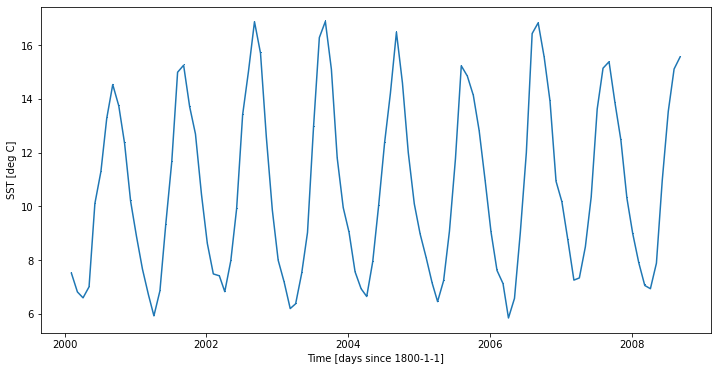

First year = 2000.0958904109589
Last year  = 2008.6849315068494


In [5]:
import balto_plot as bp
t = balto.get_years_from_time_since( times )
y = sst[:,0,0]
bp.plot_data( t, y, xmin=None, xmax=None, ymin=None, ymax=None,
               x_name='Time', x_units='days since 1800-1-1', marker=',', 
               y_name='SST', y_units='deg C',
               x_size=12,   y_size=6)
print('First year =', t[0])
print('Last year  =', t[t.size - 1])

Based on this plot, it looks like sea surface temperatures in this area have been trending upward over this time period.   The oscillations are likely associated with the 12-month solar cycle.  To check this, we plot a more restricted range of values and change the marker to a plus sign.  Remember, these are monthly mean values for sea surface temperature.  Sure enough, there are 12 data points between one trough and the next.

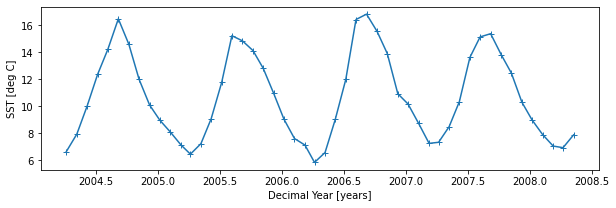

First year = 2004.2630136986302
Last year  = 2008.3506849315067


In [6]:
t2 = t[50:100]
y2 = y[50:100]
bp.plot_data( t2, y2, xmin=None, xmax=None, ymin=None, ymax=None,
               x_name='Decimal Year', x_units='years', marker='+', 
               y_name='SST', y_units='deg C', x_size=10, y_size=3)
print('First year =', t2[0])
print('Last year  =', t2[t2.size - 1])

<b>Note:</b>  These warm temperatures are consistent with current sea surface temperatures around Puerto Rico, as given on
[<b>this website</b>](https://seatemperature.info/puerto-rico-water-temperature.html).

### Show Color Image of Monthly Mean Sea Surface Temperature for a Given Time

Next, we will create a color image that shows the monthly mean SST grid for a single time.  In this case we are using the <b>show_grid_as_image()</b> function defined in <b>balto_plot.py</b>.  Try changing the <b>time_index</b> or stretch parameters in the next cell.

Extent = [4.0, 226.0, -4.0, 58.0]


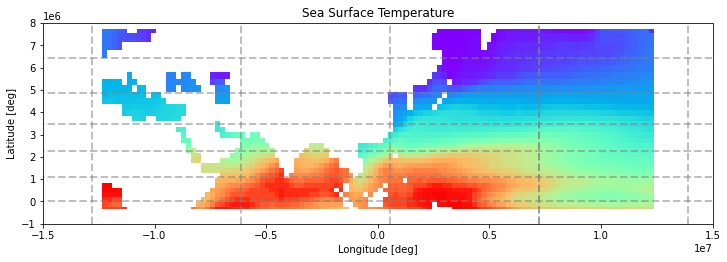

In [26]:
# Avail. color maps:  rainbow, hsv, jet, gist_rainbow, gist_ncar, gist_stern

# Available stretches:
# hist_equal, power_stretch1, power_stretch2, power_stretch3, log_stretch.
# The last 4 have parameters.  See balto_plot.py.

# For plt.imshow, need [minlon, maxlon, minlat, maxlat]
extent = [lons.min(), lons.max(), lats.min(), lats.max()]

time_index = 2
grid = sst[time_index,:,:]

bp.show_grid_as_image( grid, 'Sea Surface Temperature', extent=extent,
                       cmap='rainbow', stretch_name='hist_equal',
                       projection='mercator',
                       nodata_value=32767.0, xsize=12.0, ysize=8.0,
                       stretch_a = 1.0, stretch_b = 1.0, stretch_p = 1.0 )

## Matching Variable Names to Standardized Names  <a id="var_match"></a>

The [<b>Scientific Variables Ontology</b>](http://www.geoscienceontology.org) (SVO), developed by Peckham and Stoica provides a machine-readable mechanism for the standardized, unambiguous representation of scientific variable concepts.  Developed over many years, and spanning variables across the sciences, it can be used as the "hub" in a hub-and-spoke system to map the variable names used internally by different computational models and datasets to a common representation.  For more information, see Peckham (2014) and Stoica and Peckham (2018, 2019a, 2019b).

As you have seen from browsing datasets in the GUI, the names of variables used in scientific datasets are not standardized, and may simply be abbreviations.  This can make it difficult and time-consuming to find variables of interest in a collection of datasets.

We have developed an experimental <b>variable name matching</b> service for SVO, that is available at: http://34.73.227.230:8000/match_phrase/.  To use it, you simply append a variable name phrase, with separate words separated by underscores, to this URL in a browser.  This service is also embedded in the BALTO GUI object as a method called <b>get_possible_svo_names()</b>.

In [8]:
balto.get_possible_svo_names('sea surface temperature', SHOW_IRI=False)


Working...
Finished.

label = sea_surface_water__temperature
rank  = 0.9

label = sea_surface_air__temperature
rank  = 0.9

label = sea_surface_water__anomaly_of_temperature
rank  = 0.875

label = sea_surface_air__reference_temperature
rank  = 0.875

label = sea_ice_surface_air__temperature
rank  = 0.857

label = sea_surface_air-vs-water__difference_of_temperature
rank  = 0.812

label = sea_surface__slope
rank  = 0.667

label = sea_surface__longitude
rank  = 0.667

label = sea_surface__latitude
rank  = 0.667

label = sea_surface__elevation
rank  = 0.667

label = sea_water__temperature
rank  = 0.625

label = sea_bottom_surface__slope
rank  = 0.625

label = sea_bottom_surface__longitude
rank  = 0.625

label = sea_bottom_surface__latitude
rank  = 0.625

label = sea_bottom_surface__elevation
rank  = 0.625



In [9]:
balto.get_possible_svo_names('monthly mean', SHOW_IRI=False)

Working...
Finished.

label = snowpack__mean_of_temperature
rank  = 0.183

label = delta_front__mean_of_slope
rank  = 0.175

label = basin~drainage__mean_of_elevation
rank  = 0.175

label = snowpack__z_mean_of_mass-per-volume_density
rank  = 0.17

label = glacier_top_surface__mean_of_elevation
rank  = 0.17

label = earth__mean_of_orbital_speed
rank  = 0.17

label = delta_front_toe__mean_of_elevation
rank  = 0.17

label = delta_beds~foreset__mean_of_slope
rank  = 0.17

label = snowpack_grains__mean_of_diameter
rank  = 0.167

label = land_surface__one-month_daily_mean_of_temperature
rank  = 0.167

label = delta_plain~upper__mean_of_slope
rank  = 0.167

label = delta_plain~subaqueous__mean_of_slope
rank  = 0.167

label = delta_plain~lower__mean_of_slope
rank  = 0.167

label = sea_bottom_sediment_grain__mean_of_diameter
rank  = 0.164

label = land_surface__third_dekad_daily_mean_of_temperature
rank  = 0.164



## Low-Level Access to the GUI Settings   <a id="low_level"></a>

If you have some familiarity with the Python programming language, you can browse the 3000 or so lines of source code in <b>balto_gui.py</b> and see how to access dataset information, GUI settings and class methods directly for command-line use.  Here a few simple examples.

In [10]:
print(balto.var_short_names)
time = balto.dataset.time
print(time.actual_range)
print(time.units)
print(balto.map_minlon.value)
extent = balto.get_map_bounds(FROM_MAP=True, style='pyplot_imshow')
print('extent =', extent)

['lat', 'lon', 'time', 'time_bnds', 'sst']
[19723.0, 76214.0]
days since 1800-1-1 00:00:00
-73.4765625
extent = [-73.47656250000001, -59.41406250000001, 15.834535741221565, 20.632784250388028]


## References for More Info  <a id="references"></a>

<b>Anaconda Python Distribution</b> <br>
https://www.anaconda.com/products/individual

<b>appmode</b>, a Jupyter plugin (not used here) <br>
https://github.com/oschuett/appmode <br>
https://github.com/binder-examples/appmode

<b>BALTO, an EarthCube Project</b> <br>
https://www.earthcube.org/group/brokered-alignment-long-tail-observations-balto <br>
https://www.nsf.gov/awardsearch/showAward?AWD_ID=1740704 <br>
http://balto.opendap.org/opendap/

<b>Binder Project</b> <br>
https://mybinder.org/ <br>
https://github.com/binder-examples

<b>cartopy</b> <br>
https://scitools.org.uk/cartopy/docs/latest/ <br>
https://scitools.org.uk/cartopy/docs/latest/crs/ <br>
https://scitools.org.uk/cartopy/docs/latest/crs/projections.html <br>
https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html <br>
https://scitools.org.uk/cartopy/docs/latest/matplotlib/advanced_plotting.html

<b>conda</b> package manager for Anaconda<br>
https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

<b>ipywidgets</b> Python package <br>
https://ipywidgets.readthedocs.io/en/latest/index.html <br>
https://ipywidgets.readthedocs.io/en/latest/user_guide.html <br>
https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-the-jupyterlab-extension

<b>ipyleaflet</b> Python package <br> 
https://ipyleaflet.readthedocs.io/en/latest/

<b>Jupyter Lab Project</b> <br>
https://jupyterlab.readthedocs.io/en/stable/index.html <br>
https://jupyterlab.readthedocs.io/en/stable/user/extensions.html

<b>Jupyter Project</b> <br>
(Jupyter notebook and Jupyter lab) <br>
https://jupyter.org/ <br>
https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/

<b>NetCDF CF Conventions</b> <br>
http://cfconventions.org/cf-conventions/cf-conventions.html

<b>OpenDAP Data Access Protocol</b> <br>
https://www.opendap.org/ <br>
https://opendap.github.io/documentation/QuickStart.html <br>
https://www.opendap.org/support/user-documentation

Peckham, S.D. (2014) The CSDMS Standard Names:  Cross-domain naming conventions for describing process models, data sets and their associated variables, Proceedings of the 7th Intl. Congress on Env. Modelling and Software, International Environmental Modelling and Software Society (iEMSs), San Diego, CA. (Eds.  D.P. Ames, N.W.T. Quinn, A.E. Rizzoli),  Paper 12.  http://scholarsarchive.byu.edu/iemssconference/2014/Stream-A/12/.![image.png](attachment:image.png)

<b>pydap</b> Python package <br>
https://www.pydap.org/en/latest/ <br>
https://github.com/pydap/pydap

<b>Scientific Variables Ontology</b> (SVO) <br>
http://www.geoscienceontology.org/ <br>

Stoica, M. and S.D. Peckham (2019a) The Scientific Variables Ontology:  A blueprint for custom manual and automated creation and alignment of machine-interpretable qualitative and quantitative variable concepts, MWS 2019: Modeling the World’s Systems, http://pittmodelingconference.sci.pitt.edu.![image.png](attachment:image.png)

Stoica, M. and S.D. Peckham (2019b) Incorporating new concepts into the Scientific Variables Ontology, Workshop on Advanced Knowledge Technologies for Science in a FAIR World, San Diego, CA, (Sept. 24, 2019) http://mint-project.info/assets/publications/stoica-peckham_escience19_abstract.pdf, https://www.isi.edu/ikcap/akts/akts2019/.![image.png](attachment:image.png)

Stoica, M. and S.D. Peckham (2018) An ontology blueprint for constructing qualitative and quantitative scientific variables, ISWC 2018: The 17th International Semantic Web Conference, Monterey, CA (Oct. 8-12), http://ceur-ws.org/Vol-2180/paper-64.pdf![image.png](attachment:image.png)

<b>traitlets</b> Python package (used by ipywidgets) <br>
https://traitlets.readthedocs.io/en/stable/


## Appendix 1:  Set up a conda environment called "balto"    <a id="setup"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 from an Anaconda distribution and to install the required Python packages in a conda environment called <b>balto</b>.  This prevents conflicts with other Python packages you may have installed.  The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).
The BALTO GUI requires the additional packages:
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/), 
[<b>ipywidgets</b>](https://ipywidgets.readthedocs.io/en/latest/), 
[<b>ipyleaflet</b>](https://ipyleaflet.readthedocs.io/en/latest/), 
[<b>pydap</b>](https://www.pydap.org/en/latest/), and
[<b>matplotlib</b>](https://matplotlib.org/).
Simply type the following commands at an OS prompt after installing Anaconda.

``` bash
% conda update -n base -c defaults conda
% conda create --name balto
% conda activate balto
% conda list
% conda install -c conda-forge nb_conda
% conda install -c conda-forge ipywidgets
% conda install -c conda-forge ipyleaflet
% conda install -c conda-forge pydap
% conda install -c conda-forge matplotlib
% conda install -c conda-forge scipy
% conda install -c conda-forge cartopy
```

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b>,
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3) and <b>traitlets</b>
        (4.3.3), among many others.</li> 
    <li> Installing <b>ipywidgets</b> triggers installation of 
        <b>widgetsnbextension</b> (3.5.1).
    <li> Installing <b>ipyleaflet</b> triggers installation of <b>branca</b> and
        <b>traittypes</b>.
    <li> Installing <b>pydap</b>, triggers installation of <b>numpy</b> (1.18.4),
        <b>requests</b> (2.23.0) and <b>urllib3</b> (1.25.9), and many others.
</ul>

<b>Note:</b> Many packages depend on the [<b>numpy</b>](https://numpy.org/) package, so it often gets installed as a dependency. Installing either pydap or matplotlib causes numpy to get installed.

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:balto\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate balto</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "BALTO_GUI.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:balto\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package and 2 extensions, as follows.

``` bash
% conda activate balto
% conda install -c conda-forge jupyterlab
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

The two extensions here provide support for <b>ipyleaflet</b> and <b>ipywidgets</b>.

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

<b>Note:</b>  At one point it was also necessary to install <b>nodejs</b> with: "% conda install -c conda-forge nodejs", but that is no longer the case.